# Supervised Learning with H2O - Classification

## H2O

H2O is a fully open source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms including gradient boosted machines, generalized linear models, deep learning and more.






## Installation
H2O offers an R package that can be installed from CRAN and a python package that can be installed from PyPI. In this session, I shall be working with only the Python implementation. Also, you may want to look at the [documentation](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html#install-in-python) for complete details.

## Testing installation
Every new python session begins by initializing a connection between the python client and the H2O cluster. A cluster is a group of H2O nodes that work together; when a job is submitted to a cluster, all the nodes in the cluster work on a portion of the job.

To check if everything is in place, open your Jupyter Notebooks and type in the following:

In [43]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,8 hours 10 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_parulpandey_9oe7qo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.050 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


By default, H2O instance uses all the cores and about 25% of the system’s memory. However, in case you wish to allocate it a fixed chunk of memory, you can specify it in the init function. 



## Objective


We’re going to use machine learning with H2O to predict whether or not a loan holder will default. To do this, we are going to build two classification models: a Linear model, and a Gradient Boosting Machine model, to predict whether or not a loan will be delinquent.


In [2]:
#Import H2O and other libraries that will be used in this tutorial 
import h2o
import matplotlib as plt
%matplotlib inline

#Import the Estimators
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

#Import h2o grid search 
import h2o.grid 
from h2o.grid.grid_search import H2OGridSearch

## Importing the dataset




In [3]:
#Import the dataset 
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


Now that we have our dataset, we will explore some concepts and then do some exploration of the data and prepare it for modeling.

In [45]:
loan_level.head()

CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
669,200206,N,202901,nan,0,1,O,80,33,162000,80,7.12,R,N,FRM,WV,SF,26100,F199Q1000004,P,320,2,Other sellers,Other servicers,TRUE,FALSE
732,199904,N,202903,17140,0,1,O,25,10,53000,25,6.5,R,N,FRM,OH,SF,45200,F199Q1000005,N,360,1,Other sellers,Other servicers,TRUE,FALSE
679,200208,N,202902,15940,30,1,O,91,48,133000,91,6.75,R,N,FRM,OH,SF,44700,F199Q1000007,P,319,1,Other sellers,Other servicers,TRUE,FALSE
721,200209,N,202902,38060,0,1,O,39,13,174000,39,6.625,T,N,FRM,AZ,SF,85200,F199Q1000013,N,318,2,Other sellers,Other servicers,TRUE,FALSE
618,200210,N,202902,10420,25,1,O,85,24,122000,85,6.375,R,N,FRM,OH,SF,44200,F199Q1000015,N,317,2,Other sellers,Other servicers,TRUE,FALSE
738,200211,N,202903,10420,0,1,O,73,44,218000,73,6,R,N,FRM,OH,SF,44300,F199Q1000016,P,317,2,Other sellers,Other servicers,TRUE,FALSE
761,200211,N,202904,nan,0,1,O,73,31,138000,73,6.375,R,N,FRM,SC,PU,29500,F199Q1000017,P,318,2,Other sellers,Other servicers,TRUE,FALSE
707,200211,N,202903,33340,0,1,O,60,57,136000,60,6.25,R,N,FRM,WI,SF,53000,F199Q1000018,C,317,2,Other sellers,Other servicers,TRUE,FALSE
760,200211,N,202903,33340,0,1,O,63,30,79000,63,6.125,R,N,FRM,WI,SF,53000,F199Q1000019,N,317,2,Other sellers,Other servicers,TRUE,FALSE
691,200302,N,202901,15940,0,1,O,65,25,130000,65,5.875,R,N,FRM,OH,SF,44700,F199Q1000023,P,312,2,Other sellers,Other servicers,TRUE,FALSE


In [5]:
loan_level.describe()

Rows:500137
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199901.0,,202402.0,10180.0,0.0,1.0,,6.0,1.0,8000.0,6.0,4.625,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.5362124215458,200025.4309519192,,203023.19587233098,30777.824739295047,7.744531707523455,1.0288902574110144,,76.05357071446284,32.917540518705394,136493.48478516893,75.7107140572013,7.182686863799317,,,,,,55490.857138286694,NaN,,359.8554696013292,1.6302946648262613,,,,
maxs,839.0,201103.0,,204101.0,49740.0,55.0,4.0,,180.0,65.0,578000.0,100.0,11.5,,,,,,99900.0,NaN,,362.0,2.0,,,,
sigma,54.79126197408833,109.81554141521666,,110.38418855758627,11333.401144164463,12.046545969492563,0.21839057355939087,,15.139986048512696,11.111799994455252,60968.74306564563,14.93771708896868,0.5799408623980542,,,,,,29505.38225880303,NaN,,1.90825071041874,0.48272535304031633,,,,
zeros,0,0,,0,0,309979,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,2711,0,0,0,70149,51048,3,0,13,14929,0,9,0,0,0,0,0,0,31,0,0,0,247,0,0,0,0
0,669.0,200206.0,N,202901.0,nan,0.0,1.0,O,80.0,33.0,162000.0,80.0,7.12,R,N,FRM,WV,SF,26100.0,F199Q1000004,P,320.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,732.0,199904.0,N,202903.0,17140.0,0.0,1.0,O,25.0,10.0,53000.0,25.0,6.5,R,N,FRM,OH,SF,45200.0,F199Q1000005,N,360.0,1.0,Other sellers,Other servicers,TRUE,FALSE
2,679.0,200208.0,N,202902.0,15940.0,30.0,1.0,O,91.0,48.0,133000.0,91.0,6.75,R,N,FRM,OH,SF,44700.0,F199Q1000007,P,319.0,1.0,Other sellers,Other servicers,TRUE,FALSE


The total number of rows in our dataset is 500,137, and the total number of features or columns is 27. Additionally, you will get a sense of the spread of each of your columns, the column type, as well as the number of missing and zero values in your dataset.

Let's take a quick look at the response column by checking the distribution.

In [6]:
loan_level["DELINQUENT"].table()

DELINQUENT,Count
FALSE,482146
TRUE,17991


As you can see, we have a very imbalanced dataset, as only 3.6% of the samples are TRUE labels, meaning that only 3.6% of the samples in the dataset have been labeled as DELINQUENT.



## Train Test Split

Since we have a large enough dataset, we will split our dataset into three sets, and we will call them train, valid, and test. We will treat the test set as if it were some unseen data in which we want to make predictions, and we will use the valid set for validation purposes and to tune all our models. We will not use the test set until the end of the tutorial to check the final scores of our models.



In [7]:
train, valid, test = loan_level.split_frame([0.7, 0.15], seed=42)

We can check the distribution of the data split by checking the number of rows in each set.

In [8]:
print("train:%d valid:%d test:%d" % (train.nrows, valid.nrows, test.nrows))

train:350268 valid:74971 test:74898


## Assigning Target and Predictor Variables
Next, we need to choose our predictors, or x variable, and our response or y variable. For the H2O-3 estimators, we do not use the actual data frame; instead, we use strings containing the name of the columns in our dataset.

For our y variable, we will choose DELINQUENT because we want to predict whether or not a loan will default. For the x variable, we will choose all but four features. One is the feature that we will predict, and then PREPAID and PREPAYMENT_PENALTY_MORTGAGE_FLAG because they are clear indicators if a loan is or is not delinquent and we will not have the information at the time deciding whether to give a loan or not. In machine learning terms, introducing these types of features is called leakage. And lastly, PRODUCT_TYPE because that’s a constant value for every row, meaning all samples have the same value; therefore, this feature will not have any predictive value.

In [9]:
y = "DELINQUENT"

ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"] 

x = list(set(train.names) - set(ignore))

In [10]:
print(x)

['LOAN_PURPOSE', 'LOAN_SEQUENCE_NUMBER', 'NUMBER_OF_UNITS', 'MATURITY_DATE', 'ORIGINAL_LOAN_TERM', 'SELLER_NAME', 'ORIGINAL_INTEREST_RATE', 'FIRST_PAYMENT_DATE', 'CREDIT_SCORE', 'PROPERTY_TYPE', 'METROPOLITAN_STATISTICAL_AREA', 'MORTGAGE_INSURANCE_PERCENTAGE', 'PROPERTY_STATE', 'ORIGINAL_LOAN_TO_VALUE', 'OCCUPANCY_STATUS', 'CHANNEL', 'POSTAL_CODE', 'ORIGINAL_UPB', 'FIRST_TIME_HOMEBUYER_FLAG', 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'NUMBER_OF_BORROWERS', 'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'SERVICER_NAME']


## Build a [GLM](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html)

Now that we have our train, valid, and test sets, as well as our x and y variables defined, we can start building models! We will start with an H2O Generalized Linear Model (GLM). A GLM fits a generalized linear model, specified by a response variable, a set of predictors, and a description of the error distribution. Since we have a binomial classification problem, we have to specify the family, in this case, it will be binomial.



In [11]:
glm = H2OGeneralizedLinearEstimator(family = "binomial", seed=42, model_id = 'default_glm')

Now we will train our GLM model. To do so, we just use the .train() function. In the train function, we need to specify the predictors (x), the response (y), the training set (train), and a validation frame, if you have one. In our case, we have our valid set, which we will use.

In [12]:
%time glm.train(x = x, y = y, training_frame = train, validation_frame = valid)

/Users/parulpandey/anaconda3/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 49.6 ms, sys: 8.39 ms, total: 58 ms
Wall time: 1.65 s


You have now built and trained a GLM! If you type the name of your model in a new cell and run it, H2O will give you a complete summary of your model. You will see your model’s metrics on the training and validation set. From the model details, you will see a short summary with the parameters of your model, the metrics of your model, the confusion matrix, maximum matrices at different thresholds, a Gains/Lift table, and the scoring history

In [13]:
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  default_glm


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 6.626E-5 )",161,87,5,py_4_sid_b63e




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.031429596152939394
RMSE: 0.17728394217452237
LogLoss: 0.12332208377108474
Null degrees of freedom: 350267
Residual degrees of freedom: 350180
Null deviance: 108932.13150363766
Residual deviance: 86391.55927666061
AIC: 86567.55927666061
AUC: 0.8502065574882316
AUCPR: 0.20627736272382008
Gini: 0.7004131149764632

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1280457299765312: 


,,FALSE,TRUE,Error,Rate
0,FALSE,321921.0,15686.0,0.0465,(15686.0/337607.0)
1,TRUE,7889.0,4772.0,0.6231,(7889.0/12661.0)
2,Total,329810.0,20458.0,0.0673,(23575.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128046,0.288173,208.0
1,max f2,0.066761,0.386494,269.0
2,max f0point5,0.217579,0.288088,149.0
3,max accuracy,0.975799,0.963851,0.0
4,max precision,0.547351,0.399068,45.0
5,max recall,0.000943,1.000000,398.0
6,max specificity,0.975799,0.999997,0.0
7,max absolute_mcc,0.110350,0.267474,222.0
8,max min_per_class_accuracy,0.039248,0.772256,307.0
9,max mean_per_class_accuracy,0.036884,0.774164,311.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.315158,10.543228,10.543228,0.381102,0.446474,0.381102,0.446474,0.105442,0.105442,954.322761,954.322761,0.099020
1,2,0.020002,0.231807,7.636930,9.090079,0.276049,0.268298,0.328576,0.357386,0.076376,0.181818,663.692966,809.007863,0.167885
2,3,0.030003,0.189192,6.160088,8.113415,0.222666,0.209040,0.293272,0.307937,0.061607,0.243425,516.008804,711.341510,0.221426
3,4,0.040001,0.160993,5.332368,7.418302,0.192747,0.174416,0.268146,0.274564,0.053313,0.296738,433.236765,641.830211,0.266365
4,5,0.050002,0.140669,4.517398,6.838088,0.163289,0.150331,0.247174,0.249716,0.045178,0.341916,351.739790,583.808814,0.302862
5,6,0.100001,0.087242,3.361581,5.099884,0.121510,0.109615,0.184344,0.179667,0.168075,0.509991,236.158061,409.988400,0.425366
6,7,0.150002,0.062797,2.344126,4.181281,0.084732,0.073801,0.151139,0.144378,0.117210,0.627202,134.412631,318.128062,0.495095
7,8,0.200001,0.048195,1.674472,3.554596,0.060526,0.054956,0.128487,0.122023,0.083722,0.710923,67.447154,255.459624,0.530083
8,9,0.300002,0.031474,1.151561,2.753585,0.041625,0.038938,0.099533,0.094328,0.115157,0.826080,15.156123,175.358457,0.545807
9,10,0.399999,0.021722,0.623978,2.221194,0.022555,0.026217,0.080289,0.077301,0.062396,0.888476,-37.602240,122.119423,0.506796




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.031085188182299453
RMSE: 0.17630992082778396
LogLoss: 0.12278299434179599
Null degrees of freedom: 74970
Residual degrees of freedom: 74883
Null deviance: 22974.59746448409
Residual deviance: 18410.327737597574
AIC: 18586.327737597574
AUC: 0.8449582112507165
AUCPR: 0.1975656889474204
Gini: 0.6899164225014329

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12239564072349282: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68666.0,3647.0,0.0504,(3647.0/72313.0)
1,TRUE,1620.0,1038.0,0.6095,(1620.0/2658.0)
2,Total,70286.0,4685.0,0.0703,(5267.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.122396,0.282718,205.0
1,max f2,0.063173,0.373275,266.0
2,max f0point5,0.229540,0.288998,137.0
3,max accuracy,0.963906,0.964533,0.0
4,max precision,0.391435,0.393939,78.0
5,max recall,0.000519,1.000000,399.0
6,max specificity,0.963906,0.999986,0.0
7,max absolute_mcc,0.122396,0.259827,205.0
8,max min_per_class_accuracy,0.038297,0.765506,304.0
9,max mean_per_class_accuracy,0.039845,0.767850,301.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.317181,10.304517,10.304517,0.365333,0.454563,0.365333,0.454563,0.103085,0.103085,930.451668,930.451668,0.096503
1,2,0.020008,0.233854,8.386523,9.345520,0.297333,0.270489,0.331333,0.362526,0.083898,0.186983,738.652270,834.551969,0.173112
2,3,0.030012,0.187984,6.318098,8.336379,0.224000,0.208481,0.295556,0.311178,0.063205,0.250188,531.809782,733.637907,0.228270
3,4,0.040002,0.159089,4.631926,7.411192,0.164219,0.172381,0.262754,0.276513,0.046275,0.296464,363.192609,641.119224,0.265888
4,5,0.050006,0.139521,4.136850,6.756149,0.146667,0.149179,0.239531,0.251039,0.041384,0.337848,313.684976,575.614907,0.298422
5,6,0.100012,0.087391,3.212556,4.984353,0.113897,0.109604,0.176714,0.180322,0.160647,0.498495,221.255641,398.435274,0.413130
6,7,0.150005,0.062516,2.325398,4.098192,0.082444,0.073868,0.145296,0.144843,0.116253,0.614748,132.539762,309.819199,0.481826
7,8,0.200011,0.048240,1.737940,3.508090,0.061616,0.054946,0.124375,0.122367,0.086907,0.701655,73.794035,250.808973,0.520084
8,9,0.300009,0.031163,1.124921,2.713735,0.039883,0.038898,0.096212,0.094545,0.112491,0.814146,12.492095,171.373545,0.533035
9,10,0.400008,0.021594,0.665923,2.201799,0.023609,0.026044,0.078062,0.077421,0.066591,0.880737,-33.407690,120.179944,0.498400




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-09-22 07:18:49,0.000 sec,0,54466.065752,0.155498,,,,,,,,,,,,,,
1,,2020-09-22 07:18:49,0.296 sec,1,50061.613368,0.144447,,,,,,,,,,,,,,
2,,2020-09-22 07:18:50,0.335 sec,2,43570.207802,0.125483,,,,,,,,,,,,,,
3,,2020-09-22 07:18:50,0.376 sec,3,43215.311321,0.124491,,,,,,,,,,,,,,
4,,2020-09-22 07:18:50,0.415 sec,4,43195.943426,0.124463,,,,,,,,,,,,,,
5,,2020-09-22 07:18:50,0.452 sec,5,43195.779638,0.124463,0.177284,0.123322,0.0978884,NaN,NaN,10.5432,0.0673056,0.17631,0.122783,0.0909898,0.844958,0.197566,10.3045,0.0702538


From the summary results, we can see the GLM performance. We will focus on the Area Under the Curve (AUC), and since we have a very imbalanced dataset, we will be looking at the F1 score. Additionally, we will also take a quick look at the misclassification error and logloss.

From the report, we can look at the metrics on the training and validation data, and we see that the training AUC was 0.8502 while the validation AUC was 0.8450

We can plot the Scoring history for any of our models, as shown below:

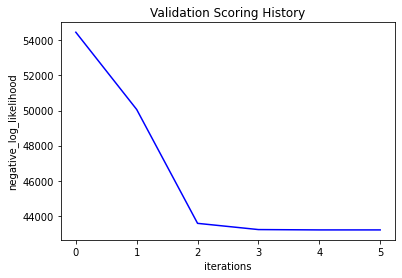

In [14]:
glm.plot(metric='negative_log_likelihood')

We can see from the plot above that after four iterations, the score no longer improves; therefore, if we needed to set a number of iterations as a future parameter, we can choose 4, as the scores don’t really improve after that point. We can also use the default number of iterations and use early stopping; that way, the model will stop training when it is no longer improving. We will use early stopping when we start tuning our models.

We can also generate a variable importance plot to see how each of our features contribute to the linear model.

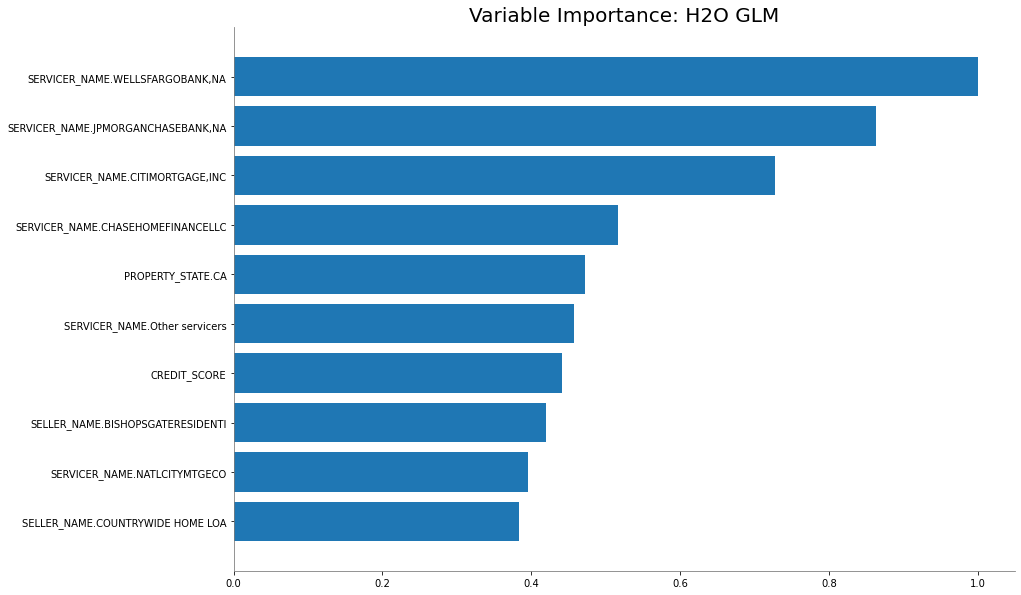

In [15]:
glm.varimp_plot()

From the variable importance plot, we can see that the most significant feature is SERVICER_NAME. In the most important feature, we have different banks or “servicers,” and in our linear model, each one makes a difference; for that reason, we see that the first four variables in the plot above are 4 of the servicers in the dataset. These services are the most influential to our model in making predictions of whether someone will default or not. Please keep in mind that it does not necessarily mean that if someone gets a loan from Wells Fargo, they have a high probability of default.

We will take a look at the first ten predictions of our model with the following command:

In [16]:
glm.predict(valid).head(10)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.994214,0.00578569
FALSE,0.997228,0.00277241
FALSE,0.964336,0.0356639
FALSE,0.996117,0.00388337
FALSE,0.996172,0.00382811
TRUE,0.652586,0.347414
FALSE,0.994137,0.00586319
FALSE,0.995791,0.00420864
FALSE,0.958106,0.0418938
FALSE,0.994599,0.00540108


Note: if you want to see more predictions use the .head() function, as shown in the line of code above; it should allow you to view all the predictions on the validation set that you want.

The model used by H2O for this classification problem is a Logistic Regression model, and the predictions are based on the threshold for each probability[1]. For a binary classifier, H2O predicts the labels based on the maximum F1 threshold. From the report, the threshold for max F1 is 0.1224. So, any time the probability for TRUE is greater than the 0.1224, the predicted label will be TRUE, as is in the case of the sixth prediction.

In [17]:
default_glm_perf=glm.model_performance(valid)

Once you save the model performance on a different data set, you can print individual metrics, such as the AUC as shown below.

In [18]:
print(default_glm_perf.auc())

0.8449582112507165


## Want to learn more?
[H2O-3 GLM Logistic Regression](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html#logistic-regression-binomial-family)

#  Tune the GLM with H2O GridSearch

Hyperparameter Tuning is nothing but searching for the right set of hyperparameter to achieve high precision and accuracy. Optimising hyperparameters constitute one of the most trickiest part in building the machine learning models. The primary aim of hyperparameter tuning is to find the sweet spot for the model’s parameters so that a better performance is obtained.

Two of the most widely-used parameter optimising techniques:-
* Grid Search
* Random Search






## Cartesian Grid Search

![](https://miro.medium.com/max/363/0*4O9P0rwkJGmFr8r6)


source: https://analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/

## Random Search
![](https://analyticsindiamag.com/wp-content/uploads/2018/06/random.png)

source: https://analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/

In [19]:
glm_grid = h2o.grid.H2OGridSearch (
    H2OGeneralizedLinearEstimator( 
        family = "binomial",
        lambda_search = True),
    
    hyper_params = {
        "alpha": [x*0.01 for x in range(0, 100)],
        "missing_values_handling" : ["Skip", "MeanImputation"],
        },
    
    grid_id = "glm_random_grid",
    
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":300,
        "max_runtime_secs":300,
        "seed":42
        }
)

%time glm_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 3.42 s, sys: 312 ms, total: 3.73 s
Wall time: 5min 4s


In [20]:
sorted_glm_grid = glm_grid.get_grid(sort_by='auc',decreasing=True)
sorted_glm_grid.sorted_metric_table()

,,alpha,missing_values_handling,model_ids,auc
0,,[0.37],Skip,glm_random_grid_model_23,0.8534303606229077
1,,[0.34],Skip,glm_random_grid_model_13,0.8534213105313417
2,,[0.51],Skip,glm_random_grid_model_11,0.853412967251469
3,,[0.44],Skip,glm_random_grid_model_3,0.8534125661838832
4,,[0.32],Skip,glm_random_grid_model_6,0.8534101150897196
5,,[0.54],Skip,glm_random_grid_model_21,0.8534092610004044
6,,[0.33],Skip,glm_random_grid_model_2,0.8533966056268216
7,,[0.23],Skip,glm_random_grid_model_32,0.8533940204321417
8,,[0.12],Skip,glm_random_grid_model_1,0.8533594561376638
9,,[0.87],Skip,glm_random_grid_model_16,0.8533582915920229


In [21]:
tuned_glm = sorted_glm_grid.models[0]
tuned_glm.summary()


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.37, lambda = 1.187E-5 )","nlambda = 100, lambda.max = 0.08978, lambda.min = 1.187E-5, lambda...",161,146,143,py_4_sid_b63e


First, evaluate the model performance on the validation set.

In [22]:
tuned_glm_perf = tuned_glm.model_performance(valid)

Now, print the AUC for the default, and the tuned model.



In [23]:
print("Default GLM AUC: %.4f \nTuned GLM AUC:%.4f" % (default_glm_perf.auc(), tuned_glm_perf.auc()))


Default GLM AUC: 0.8450 
Tuned GLM AUC:0.8534


## Build a GBM

Gradient Boosting Machine (for Regression and Classification) is a forward learning ensemble method. H2O’s GBM sequentially builds classification trees on all the features of the dataset in a fully distributed way - each tree is built in parallel.

Defining a GBM model is as simple as the other models we have been working with.

In [24]:
gbm= H2OGradientBoostingEstimator(seed=42, model_id='default_gbm')
%time gbm.train(x=x, y=y, training_frame=train, validation_frame = valid)

/Users/parulpandey/anaconda3/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 202 ms, sys: 40.5 ms, total: 242 ms
Wall time: 8.39 s


Print the model summary



In [25]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  default_gbm


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,28333.0,5.0,5.0,5.0,25.0,32.0,30.96




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.029506421363469603
RMSE: 0.1717743326678046
LogLoss: 0.11505127038888412
Mean Per-Class Error: 0.2023858106060208
AUC: 0.8781930114270322
AUCPR: 0.2950390694946684
Gini: 0.7563860228540644

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15607572690204796: 


,,FALSE,TRUE,Error,Rate
0,FALSE,326792.0,10815.0,0.032,(10815.0/337607.0)
1,TRUE,7794.0,4867.0,0.6156,(7794.0/12661.0)
2,Total,334586.0,15682.0,0.0531,(18609.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.156076,0.343436,192.0
1,max f2,0.075853,0.428220,261.0
2,max f0point5,0.269948,0.365425,131.0
3,max accuracy,0.450803,0.965035,72.0
4,max precision,0.896728,1.000000,0.0
5,max recall,0.003016,1.000000,399.0
6,max specificity,0.896728,1.000000,0.0
7,max absolute_mcc,0.144866,0.318378,200.0
8,max min_per_class_accuracy,0.039435,0.796595,308.0
9,max mean_per_class_accuracy,0.036126,0.797614,313.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.345972,14.286666,14.286666,0.516415,0.479898,0.516415,0.479898,0.142880,0.142880,1328.666572,1328.666572,0.137862
1,2,0.020002,0.247640,9.011103,11.648884,0.325721,0.290490,0.421068,0.385194,0.090119,0.232999,801.110315,1064.888444,0.220985
2,3,0.030003,0.197997,7.139384,10.145718,0.258065,0.220582,0.366733,0.330323,0.071400,0.304399,613.938409,914.571765,0.284687
3,4,0.040001,0.166786,5.482464,8.980154,0.198172,0.181255,0.324602,0.293064,0.054814,0.359213,448.246392,798.015384,0.331184
4,5,0.050002,0.144748,4.880685,8.160213,0.176420,0.155075,0.294964,0.265465,0.048811,0.408025,388.068514,716.021329,0.371450
5,6,0.100001,0.085874,3.405812,5.783080,0.123109,0.110567,0.209039,0.188018,0.170287,0.578311,240.581193,478.308048,0.496248
6,7,0.150002,0.059880,2.250930,4.605675,0.081363,0.071572,0.166480,0.149202,0.112550,0.690862,125.092991,360.567455,0.561143
7,8,0.200001,0.044609,1.525981,3.835773,0.055159,0.051662,0.138650,0.124817,0.076297,0.767159,52.598067,283.577306,0.588428
8,9,0.300002,0.027793,0.992017,2.887854,0.035858,0.035153,0.104386,0.094929,0.099202,0.866361,-0.798292,188.785440,0.587599
9,10,0.399999,0.019080,0.537884,2.300375,0.019443,0.023012,0.083151,0.076950,0.053787,0.920148,-46.211551,130.037450,0.539656




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.030145356735784883
RMSE: 0.17362418246253855
LogLoss: 0.11952062413571642
Mean Per-Class Error: 0.2242541716041575
AUC: 0.8541170986087288
AUCPR: 0.23773133290345963
Gini: 0.7082341972174575

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1670709331729805: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70224.0,2089.0,0.0289,(2089.0/72313.0)
1,TRUE,1821.0,837.0,0.6851,(1821.0/2658.0)
2,Total,72045.0,2926.0,0.0522,(3910.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.167071,0.299785,178.0
1,max f2,0.070072,0.392875,264.0
2,max f0point5,0.251696,0.321232,132.0
3,max accuracy,0.592678,0.964946,29.0
4,max precision,0.895425,1.000000,0.0
5,max recall,0.003295,1.000000,398.0
6,max specificity,0.895425,1.000000,0.0
7,max absolute_mcc,0.100167,0.279877,230.0
8,max min_per_class_accuracy,0.035648,0.773416,314.0
9,max mean_per_class_accuracy,0.031420,0.775746,322.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.344236,13.012273,13.012273,0.461333,0.473428,0.461333,0.473428,0.130173,0.130173,1201.227289,1201.227289,0.124586
1,2,0.020008,0.243068,7.784799,10.398536,0.276000,0.287629,0.368667,0.380528,0.077878,0.208051,678.479910,939.853599,0.194955
2,3,0.030012,0.195026,6.054844,8.950639,0.214667,0.217315,0.317333,0.326124,0.060572,0.268623,505.484374,795.063858,0.247382
3,4,0.040002,0.163482,4.933190,7.947281,0.174900,0.178416,0.281761,0.289234,0.049285,0.317908,393.318958,694.728102,0.288121
4,5,0.050006,0.141967,3.723165,7.102232,0.132000,0.152511,0.251800,0.261882,0.037246,0.355154,272.316479,610.223243,0.316365
5,6,0.100012,0.085865,3.468357,5.285295,0.122966,0.109552,0.187383,0.185717,0.173439,0.528593,246.835715,428.529479,0.444334
6,7,0.150005,0.060279,2.197463,4.256201,0.077908,0.071692,0.150898,0.147716,0.109857,0.638450,119.746313,325.620062,0.506399
7,8,0.200011,0.044445,1.617564,3.596497,0.057349,0.051758,0.127509,0.123725,0.080888,0.719338,61.756353,259.649735,0.538416
8,9,0.300009,0.027777,1.068487,2.753865,0.037882,0.035185,0.097635,0.094213,0.106847,0.826185,6.848679,175.386463,0.545516
9,10,0.400008,0.019122,0.639587,2.225313,0.022676,0.023018,0.078896,0.076415,0.063958,0.890143,-36.041284,122.531289,0.508151




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-09-22 07:25:45,0.033 sec,0.0,0.186655,0.155498,0.500000,0.036147,1.000000,0.963853,0.184925,0.153223,0.500000,0.035454,1.000000,0.964546
1,,2020-09-22 07:25:46,0.702 sec,1.0,0.184765,0.147793,0.813317,0.179129,8.555719,0.075742,0.183099,0.145890,0.802085,0.169243,8.720747,0.056662
2,,2020-09-22 07:25:46,1.112 sec,2.0,0.183459,0.143542,0.826473,0.187720,8.791581,0.075742,0.181892,0.142011,0.812856,0.173714,8.818929,0.071134
3,,2020-09-22 07:25:46,1.246 sec,3.0,0.182341,0.140210,0.835080,0.198593,10.487783,0.057722,0.180861,0.138954,0.821264,0.183773,10.026278,0.060690
4,,2020-09-22 07:25:47,1.364 sec,4.0,0.181368,0.137493,0.840208,0.207142,10.765505,0.066426,0.179975,0.136474,0.826905,0.190732,10.490061,0.061837
5,,2020-09-22 07:25:47,1.498 sec,5.0,0.180583,0.135441,0.841629,0.210621,11.014035,0.065013,0.179279,0.134624,0.828782,0.193185,10.352126,0.062144
6,,2020-09-22 07:25:47,1.641 sec,6.0,0.179867,0.133582,0.843628,0.214550,11.119672,0.068339,0.178659,0.133004,0.830120,0.196673,10.577173,0.068053
7,,2020-09-22 07:25:47,1.806 sec,7.0,0.179205,0.131895,0.846607,0.220035,11.354027,0.064719,0.178059,0.131466,0.832486,0.202264,10.680594,0.059396
8,,2020-09-22 07:25:47,1.966 sec,8.0,0.178666,0.130545,0.848053,0.223481,11.535026,0.062666,0.177618,0.130322,0.833550,0.203886,10.943848,0.074189
9,,2020-09-22 07:25:47,2.162 sec,9.0,0.178168,0.129365,0.849110,0.226545,11.638101,0.064982,0.177223,0.129354,0.834014,0.205516,11.102281,0.071534



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,CREDIT_SCORE,2309.658691,1.000000,0.294923
1,SERVICER_NAME,1683.956299,0.729093,0.215026
2,PROPERTY_STATE,1255.222290,0.543467,0.160281
3,SELLER_NAME,997.285217,0.431789,0.127345
4,NUMBER_OF_BORROWERS,316.293396,0.136944,0.040388
5,ORIGINAL_INTEREST_RATE,300.391693,0.130059,0.038357
6,ORIGINAL_UPB,292.308807,0.126559,0.037325
7,MORTGAGE_INSURANCE_PERCENTAGE,186.016342,0.080538,0.023753
8,ORIGINAL_LOAN_TO_VALUE,158.307068,0.068541,0.020214
9,PROPERTY_TYPE,64.317169,0.027847,0.008213



See the whole table with table.as_data_frame()


The default GBM model had a slightly better performance than the default GLM. We will make the predictions with the GBM model as well.

In [26]:
gbm.predict(valid)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.978372,0.0216281
FALSE,0.995024,0.00497636
FALSE,0.964645,0.0353549
FALSE,0.99305,0.00694996
FALSE,0.99217,0.0078297
TRUE,0.591272,0.408728
FALSE,0.993899,0.00610064
FALSE,0.995599,0.00440117
FALSE,0.950489,0.0495107
FALSE,0.992925,0.00707464


Once again, save the model performance.

In [27]:
default_gbm_per = gbm.model_performance(valid)

Next, we will tune our models and see if we can achieve better performance.

Print the models

# Tune the GBM model with H2O GridSearch

In [28]:
hyper_params = {'max_depth' : [3,4,5,6,7,8,9,10,12,13,15],
               }

gbm = H2OGradientBoostingEstimator(model_id='grid_gbm', ntrees=50,
    seed=42
    )

gbm_grid = H2OGridSearch(gbm, hyper_params,
                         grid_id = 'depth_gbm_grid',
                         search_criteria = {
                             "strategy":"Cartesian"})

%time gbm_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 896 ms, sys: 84 ms, total: 980 ms
Wall time: 2min 15s


In [29]:
sorted_gbm_depth = gbm_grid.get_grid(sort_by='auc',decreasing=True)
sorted_gbm_depth.sorted_metric_table()

,,max_depth,model_ids,auc
0,,6,depth_gbm_grid_model_4,0.8545923078708804
1,,5,depth_gbm_grid_model_3,0.8541170986087288
2,,7,depth_gbm_grid_model_5,0.8528663309115709
3,,8,depth_gbm_grid_model_6,0.8513605529560967
4,,4,depth_gbm_grid_model_2,0.8511981455252366
5,,9,depth_gbm_grid_model_7,0.8497735374676534
6,,3,depth_gbm_grid_model_1,0.8476401398039958
7,,10,depth_gbm_grid_model_8,0.8450226310613556
8,,12,depth_gbm_grid_model_9,0.8346136315461742
9,,13,depth_gbm_grid_model_10,0.8323082222705518


In [30]:
gbm = H2OGradientBoostingEstimator(
    ntrees=500,
    learn_rate=0.05,
    seed=42,
    model_id='grid_gbm'
    )

hyper_params_tune = {
                'max_depth' : [4, 5, 6, 7, 8],
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
}

search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 900,  
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 42 }

random_grid = H2OGridSearch(model=gbm, hyper_params=hyper_params_tune,
                         grid_id = 'random_grid',
                         search_criteria =search_criteria_tune)

%time random_grid.train(x=x, y=y, training_frame=train, validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 5.86 s, sys: 655 ms, total: 6.51 s
Wall time: 15min 3s


Print the results

In [31]:
sorted_random_search = random_grid.get_grid(sort_by='auc',decreasing=True)
sorted_random_search.sorted_metric_table()

,,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,max_depth,sample_rate,model_ids,auc
0,,0.33,1.01,0.38,7,0.99,random_grid_model_30,0.8620868754474125
1,,0.63,0.91,0.23,6,0.6,random_grid_model_25,0.8617075128951219
2,,0.63,0.97,0.35,7,0.72,random_grid_model_21,0.8614973967206373
3,,0.79,0.93,0.33,5,0.48,random_grid_model_32,0.8610029010558012
4,,0.53,0.9,0.58,8,0.82,random_grid_model_15,0.8609132611650401
5,,0.74,1.0,0.31,5,0.59,random_grid_model_5,0.8608263943124851
6,,0.82,0.98,0.26,5,0.28,random_grid_model_26,0.8606680892092531
7,,0.26,0.98,0.71,5,0.7,random_grid_model_17,0.8605897261671075
8,,0.42,1.09,0.64,7,0.71,random_grid_model_19,0.8602606945183965
9,,0.88,0.92,0.77,6,0.71,random_grid_model_20,0.8601995498063519



We will now print the AUC and F1 scores to see how the model performed:

In [32]:
tuned_gbm = sorted_random_search.models[0]
tuned_gbm.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,500.0,500.0,344586.0,0.0,7.0,3.492,1.0,128.0,45.198


In [33]:
tuned_gbm_per = tuned_gbm.model_performance(valid)
print(tuned_gbm_per.auc())
print(tuned_gbm_per.F1())

0.8620868754474125
[[0.16371106543078953, 0.31935320869125816]]


We were able to get the highest validation AUC among the three models with our GBM. The model reached a 0.8621 AUC, while also improving the F1 to 0.3194.

Let's take a look at the confusion matrix and see how are the misclassification errors from this model look like:



In [34]:
tuned_gbm_per.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16371106543078953: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69982.0,2331.0,0.0322,(2331.0/72313.0)
1,TRUE,1710.0,948.0,0.6433,(1710.0/2658.0)
2,Total,71692.0,3279.0,0.0539,(4041.0/74971.0)


Even though the misclassification error for the TRUE class improved, the error for the FALSE class and the overall error did not improve. However, with the tuning that we did, our GBM model was able to make more correct predictions for the TRUE class, which is good since we are dealing with a highly imbalanced dataset.

Here is how you can compare the AUC from the default model with the tuned model:

In [35]:
print("Default GBM AUC: %.4f \nTuned GBM AUC:%.4f" % (default_gbm_per.auc(), tuned_gbm_per.auc()))


Default GBM AUC: 0.8541 
Tuned GBM AUC:0.8621


## Test Set Performance
We are going to obtain the test performance of each of the best models. If you named your models the same as in this tutorial, then you should be able to just run the following code. Notice that we are just taking the best models and checking the model performance with the test set.

In [36]:
glm_test_per = tuned_glm.model_performance(test)
gbm_test_per = tuned_gbm.model_performance(test)

Print the test AUC of each model.

In [37]:
print("GLM Test AUC: %.4f \nGBM Test AUC: %.4f " % 
      (glm_test_per.auc(), gbm_test_per.auc()))

GLM Test AUC: 0.8549 
GBM Test AUC: 0.8646 


## Shut down Cluster
Once you are done with the tutorial, remember to shut down the cluster, unless you want to try the challenge after this task, in which case you can shut it down after you are done with the challenge.



In [ ]:
h2o.cluster().shutdown()